Connect to the MongoDB database, and access the se collection of the datasets_test database. 
The reader user is only able to list data. 

In [88]:
import pymongo
import pprint

client = pymongo.MongoClient(
    'mongodb://{}:{}@localhost/?authSource={}&authMechanism=MONGODB-CR'.format(
        'reader', 'MreaderO', 'datasets'
    )
)
col = client['datasets']['se']
datasets = list(col.find({'njobs':{'$exists':1}}))
pprint.pprint(datasets[0])
print(len(datasets))

{u'_id': ObjectId('5d1a009119071538d23f64ec'),
 u'name': u'190503%TBar_tch%tt_generic_bg_METrecoil_response_down',
 u'njobs': 3,
 u'path': u'/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_METrecoil_response_down/TBar_tch/190507_093219',
 u'prod_date': u'190503',
 u'sample': u'TBar_tch',
 u'sample_version': u'tt_generic_bg_METrecoil_response_down',
 u'sub_date': u'2019-05-07_11-28-15',
 u'sub_dir': u'/gridgroup/cms/touquet/crab_submission_dirs/crab_TBar_tch_tt_generic_bg_METrecoil_response_down/crab_TBar_tch_190503_tt_generic_bg_METrecoil_response_down_2019-05-07_11-28-15',
 u'subdir_pattern': u'*',
 u'subdirs': [u'0000'],
 u'tgz_pattern': u'*',
 u'tgzs': {u'0000': [u'heppyOutput_1.tgz',
                     u'heppyOutput_2.tgz',
                     u'heppyOutput_3.tgz']},
 u'write_date': u'190507_093219'}
3411


Let's find the datasets that already appeared on the SE

In [89]:
se_datasets = [ds for ds in datasets if 'path' in ds]
print(len(se_datasets))
pprint.pprint(se_datasets[0])

2964
{u'_id': ObjectId('5d1a009119071538d23f64ec'),
 u'name': u'190503%TBar_tch%tt_generic_bg_METrecoil_response_down',
 u'njobs': 3,
 u'path': u'/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_METrecoil_response_down/TBar_tch/190507_093219',
 u'prod_date': u'190503',
 u'sample': u'TBar_tch',
 u'sample_version': u'tt_generic_bg_METrecoil_response_down',
 u'sub_date': u'2019-05-07_11-28-15',
 u'sub_dir': u'/gridgroup/cms/touquet/crab_submission_dirs/crab_TBar_tch_tt_generic_bg_METrecoil_response_down/crab_TBar_tch_190503_tt_generic_bg_METrecoil_response_down_2019-05-07_11-28-15',
 u'subdir_pattern': u'*',
 u'subdirs': [u'0000'],
 u'tgz_pattern': u'*',
 u'tgzs': {u'0000': [u'heppyOutput_1.tgz',
                     u'heppyOutput_2.tgz',
                     u'heppyOutput_3.tgz']},
 u'write_date': u'190507_093219'}


A bit or preprocessing. We are going to read the tgzs field to find out how many chunks are in the dataset, and to estimate the computing efficiency

We are now using the **njobs** field to compute the efficiency

You can edit the preprocessing function to add what you need in the dataset information. 

In [90]:
import pprint
import re

pattern = re.compile('.*_(\d+)\.tgz$')
def preprocess_chunks(datasets): 
    for ds in datasets: 
        tgzs = ds.get('tgzs', None)
        if tgzs is None:
            ds['nchunks'] = 0
            ds['chunk_ids'] = []
            continue
        chunks = []
        if len(tgzs)!=1: 
            print('warning, need to see how to deal with 0000,0001, etc')
        for subd, subdchunks in tgzs.iteritems(): 
            # we do not consider the subdirectory, e.g. 0000
            chunks.extend(subdchunks)
        # find max integer
        ids = []
        for chunk in chunks: 
            # print(chunk)
            m = pattern.match(chunk)
            if m: 
                theid = int(m.group(1))
                # print(theid) 
                ids.append(theid)
        ds['nchunks'] = len(chunks)
        ds['chunk_ids'] = sorted(ids)

In [91]:
preprocess_chunks(datasets)
print(datasets[500])

{u'njobs': 1, u'name': u'190503%HiggsSUSYBB80%tt_mssm_signals_TES_promptEle_1prong1pi0_down', u'sub_date': u'2019-05-17_03-20-05', 'nchunks': 0, u'prod_date': u'190503', u'sample': u'HiggsSUSYBB80', 'chunk_ids': [], u'sub_dir': u'/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB80_tt_mssm_signals_TES_promptEle_1prong1pi0_down/crab_HiggsSUSYBB80_190503_tt_mssm_signals_TES_promptEle_1prong1pi0_down_2019-05-17_03-20-05', u'_id': ObjectId('5d1a00f819071538d23f6ddc'), u'sample_version': u'tt_mssm_signals_TES_promptEle_1prong1pi0_down'}


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.DataFrame(datasets)
df.head()

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date
0,5d1a009119071538d23f64ec,"[1, 2, 3]",190503%TBar_tch%tt_generic_bg_METrecoil_response_down,3,3.0,/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_METrecoil_response_down/TBar_tch/190507_093219,190503,TBar_tch,tt_generic_bg_METrecoil_response_down,2019-05-07_11-28-15,/gridgroup/cms/touquet/crab_submission_dirs/crab_TBar_tch_tt_generic_bg_METrecoil_response_down/crab_TBar_tch_190503_tt_generic_bg_METrecoil_response_down_2019-05-07_11-28-15,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput_2.tgz', u'heppyOutput_3.tgz']}",190507_093219
1,5d1a009719071538d23f6c5e,[1],190503%HiggsSUSYBB2000%tt_mssm_signals_TES_promptMuon_1prong0pi0_down,1,1.0,/store/user/gtouquet/heppyTrees/190503/tt_mssm_signals_TES_promptMuon_1prong0pi0_down/HiggsSUSYBB2000/190517_203138,190503,HiggsSUSYBB2000,tt_mssm_signals_TES_promptMuon_1prong0pi0_down,2019-05-17_22-29-12,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB2000_tt_mssm_signals_TES_promptMuon_1prong0pi0_down/crab_HiggsSUSYBB2000_190503_tt_mssm_signals_TES_promptMuon_1prong0pi0_down_2019-05-17_22-29-12,*,[0000],*,{u'0000': [u'heppyOutput_1.tgz']},190517_203138
2,5d1a009719071538d23f6c53,[1],190503%HiggsSUSYBB100%tt_mssm_signals_TES_promptMuon_1prong0pi0_down,1,1.0,/store/user/gtouquet/heppyTrees/190503/tt_mssm_signals_TES_promptMuon_1prong0pi0_down/HiggsSUSYBB100/190517_194021,190503,HiggsSUSYBB100,tt_mssm_signals_TES_promptMuon_1prong0pi0_down,2019-05-17_21-37-54,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB100_tt_mssm_signals_TES_promptMuon_1prong0pi0_down/crab_HiggsSUSYBB100_190503_tt_mssm_signals_TES_promptMuon_1prong0pi0_down_2019-05-17_21-37-54,*,[0000],*,{u'0000': [u'heppyOutput_1.tgz']},190517_194021
3,5d1a009519071538d23f6a77,[1],190503%HiggsSUSYBB300%tt_mssm_signals_TES_HadronicTau_1prong1pi0_down,1,1.0,/store/user/gtouquet/heppyTrees/190503/tt_mssm_signals_TES_HadronicTau_1prong1pi0_down/HiggsSUSYBB300/190518_094152,190503,HiggsSUSYBB300,tt_mssm_signals_TES_HadronicTau_1prong1pi0_down,2019-05-18_11-39-32,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB300_tt_mssm_signals_TES_HadronicTau_1prong1pi0_down/crab_HiggsSUSYBB300_190503_tt_mssm_signals_TES_HadronicTau_1prong1pi0_down_2019-05-18_11-39-32,*,[0000],*,{u'0000': [u'heppyOutput_1.tgz']},190518_094152
4,5d1a009719071538d23f6c4a,[1],190503%HiggsSUSYGG350%tt_mssm_signals_TES_promptEle_1prong1pi0_up,1,1.0,/store/user/gtouquet/heppyTrees/190503/tt_mssm_signals_TES_promptEle_1prong1pi0_up/HiggsSUSYGG350/190518_062335,190503,HiggsSUSYGG350,tt_mssm_signals_TES_promptEle_1prong1pi0_up,2019-05-18_08-21-04,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG350_tt_mssm_signals_TES_promptEle_1prong1pi0_up/crab_HiggsSUSYGG350_190503_tt_mssm_signals_TES_promptEle_1prong1pi0_up_2019-05-18_08-21-04,*,[0000],*,{u'0000': [u'heppyOutput_1.tgz']},190518_062335


## number of jobs PLEASE READ 

Some datasets have a NaN number of jobs, which means that this information could not be extracted from the crab logs.
It turns out that these datasets also do not appear on the SE. What are they? 

In [94]:
nullnjobs = df[df['njobs'].isnull()]
nullnjobs

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date
239,5d1a00f219071538d23f6cde,[],190503%WWToLNuQQ%tt_generic_bg_Btagging_up,0,NaN,NaN,190503,WWToLNuQQ,tt_generic_bg_Btagging_up,2019-05-08_16-23-00,/gridgroup/cms/touquet/crab_submission_dirs/crab_WWToLNuQQ_tt_generic_bg_Btagging_up/crab_WWToLNuQQ_190503_tt_generic_bg_Btagging_up_2019-05-08_16-23-00,NaN,NaN,NaN,NaN,NaN
249,5d1a00f219071538d23f6ce7,[],190503%HiggsSUSYBB2300%tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,0,NaN,NaN,190503,HiggsSUSYBB2300,tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,2019-05-16_03-47-49,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB2300_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down/crab_HiggsSUSYBB2300_190503_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down_2019-05-16_03-47-49,NaN,NaN,NaN,NaN,NaN
281,5d1a00f319071538d23f6d0a,[],190503%HiggsGGH125%tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down,0,NaN,NaN,190503,HiggsGGH125,tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down,2019-05-10_22-47-27,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsGGH125_tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down/crab_HiggsGGH125_190503_tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down_2019-05-10_22-47-27,NaN,NaN,NaN,NaN,NaN
283,5d1a00f319071538d23f6d0c,[],190503%HiggsVBF125%tt_sm_higgs_TES_promptMuon_1prong0pi0_up,0,NaN,NaN,190503,HiggsVBF125,tt_sm_higgs_TES_promptMuon_1prong0pi0_up,2019-05-10_16-25-34,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsVBF125_tt_sm_higgs_TES_promptMuon_1prong0pi0_up/crab_HiggsVBF125_190503_tt_sm_higgs_TES_promptMuon_1prong0pi0_up_2019-05-10_16-25-34,NaN,NaN,NaN,NaN,NaN
316,5d1a00f419071538d23f6d29,[],190503%HiggsVBF125%tt_sm_higgs_nominal,0,NaN,NaN,190503,HiggsVBF125,tt_sm_higgs_nominal,2019-05-11_02-28-41,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsVBF125_tt_sm_higgs_nominal/crab_HiggsVBF125_190503_tt_sm_higgs_nominal_2019-05-11_02-28-41,NaN,NaN,NaN,NaN,NaN
321,5d1a00f419071538d23f6d2e,[],190503%W4JetsToLNu_LO%tt_generic_bg_Btagging_up,0,NaN,NaN,190503,W4JetsToLNu_LO,tt_generic_bg_Btagging_up,2019-05-08_14-59-42,/gridgroup/cms/touquet/crab_submission_dirs/crab_W4JetsToLNu_LO_tt_generic_bg_Btagging_up/crab_W4JetsToLNu_LO_190503_tt_generic_bg_Btagging_up_2019-05-08_14-59-42,NaN,NaN,NaN,NaN,NaN
340,5d1a00f419071538d23f6d3f,[],190503%HiggsTTH125%tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down,0,NaN,NaN,190503,HiggsTTH125,tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down,2019-05-10_23-07-34,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsTTH125_tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down/crab_HiggsTTH125_190503_tt_sm_higgs_CMS_scale_j_eta0to5_13Tev_down_2019-05-10_23-07-34,NaN,NaN,NaN,NaN,NaN
348,5d1a00f519071538d23f6d48,[],190503%WToLNu_M50_Plus2J%tt_generic_bg_Btagging_up,0,NaN,NaN,190503,WToLNu_M50_Plus2J,tt_generic_bg_Btagging_up,2019-05-08_15-26-07,/gridgroup/cms/touquet/crab_submission_dirs/crab_WToLNu_M50_Plus2J_tt_generic_bg_Btagging_up/crab_WToLNu_M50_Plus2J_190503_tt_generic_bg_Btagging_up_2019-05-08_15-26-07,NaN,NaN,NaN,NaN,NaN
365,5d1a00f519071538d23f6d57,[],190503%HiggsTTH125%tt_sm_higgs_METrecoil_response_down,0,NaN,NaN,190503,HiggsTTH125,tt_sm_higgs_METrecoil_response_down,2019-05-11_02-08-36,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsTTH125_tt_sm_higgs_METrecoil_response_down/crab_HiggsTTH125_190503_tt_sm_higgs_METrecoil_response_down_2019-05-11_02-08-36,NaN,NaN,NaN,NaN,NaN
366,5d1a00f519071538d23f6d58,[],190503%HiggsGGH125%tt_sm_higgs_METrecoil_response_down,0,NaN,NaN,190503,HiggsGGH125,tt_sm_higgs_METrecoil_response_down,2019-05-11_01-48-28,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsGGH125_tt_sm_higgs_METrecoil_response_down/crab_HiggsGGH125_190503_tt_sm_higgs_METrecoil_response_down_2019-05-11_01-48-28,NaN,NaN,NaN,NaN,NaN


In [69]:
nullnjobs.shape

(50, 16)

For now set njobs to 99 for this guys 

In [74]:
df['njobs'].fillna(99, inplace=True)
df[df['njobs'].isnull()].shape

(0, 16)

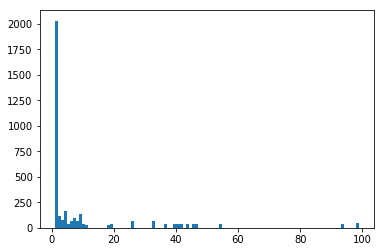

In [75]:
_ = plt.hist(df['njobs'], bins=100)

## Computing efficiency

In [78]:
df['eff'] = df['nchunks']/df['njobs']

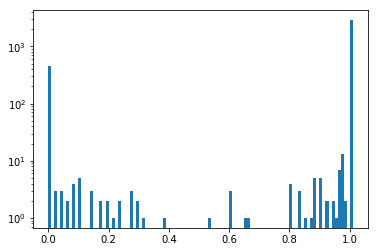

In [79]:
_ = plt.hist(df['eff'], bins=101, range=(0,1.01))
plt.yscale('log')

Filter datasets with a low efficiency. 

In [80]:
df[df['eff']<0.5]

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
239,5d1a00f219071538d23f6cde,[],190503%WWToLNuQQ%tt_generic_bg_Btagging_up,0,99.0,NaN,190503,WWToLNuQQ,tt_generic_bg_Btagging_up,2019-05-08_16-23-00,/gridgroup/cms/touquet/crab_submission_dirs/crab_WWToLNuQQ_tt_generic_bg_Btagging_up/crab_WWToLNuQQ_190503_tt_generic_bg_Btagging_up_2019-05-08_16-23-00,NaN,NaN,NaN,NaN,NaN,0.0
240,5d1a00f219071538d23f6cdf,[],190503%HiggsSUSYBB100%tt_mssm_signals_TES_promptEle_1prong1pi0_down,0,1.0,NaN,190503,HiggsSUSYBB100,tt_mssm_signals_TES_promptEle_1prong1pi0_down,2019-05-17_03-25-38,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB100_tt_mssm_signals_TES_promptEle_1prong1pi0_down/crab_HiggsSUSYBB100_190503_tt_mssm_signals_TES_promptEle_1prong1pi0_down_2019-05-17_03-25-38,NaN,NaN,NaN,NaN,NaN,0.0
241,5d1a00f219071538d23f6ce0,[],190503%ZZ%tt_generic_bg_TES_promptEle_1prong0pi0_down,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_promptEle_1prong0pi0_down,2019-05-08_12-02-33,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_promptEle_1prong0pi0_down/crab_ZZ_190503_tt_generic_bg_TES_promptEle_1prong0pi0_down_2019-05-08_12-02-33,NaN,NaN,NaN,NaN,NaN,0.0
242,5d1a00f219071538d23f6ce1,[],190503%HiggsSUSYGG1600%tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up,0,1.0,NaN,190503,HiggsSUSYGG1600,tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up,2019-05-17_00-46-31,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG1600_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up/crab_HiggsSUSYGG1600_190503_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up_2019-05-17_00-46-31,NaN,NaN,NaN,NaN,NaN,0.0
243,5d1a00f219071538d23f6ce2,[],190503%HiggsSUSYBB100%tt_mssm_signals_METrecoil_resolution_down,0,1.0,NaN,190503,HiggsSUSYBB100,tt_mssm_signals_METrecoil_resolution_down,2019-05-16_22-48-24,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB100_tt_mssm_signals_METrecoil_resolution_down/crab_HiggsSUSYBB100_190503_tt_mssm_signals_METrecoil_resolution_down_2019-05-16_22-48-24,NaN,NaN,NaN,NaN,NaN,0.0
245,5d1a00f219071538d23f6ce3,[],190503%HiggsSUSYBB130%tt_mssm_signals_METunclustered_down,0,1.0,NaN,190503,HiggsSUSYBB130,tt_mssm_signals_METunclustered_down,2019-05-16_15-12-21,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB130_tt_mssm_signals_METunclustered_down/crab_HiggsSUSYBB130_190503_tt_mssm_signals_METunclustered_down_2019-05-16_15-12-21,NaN,NaN,NaN,NaN,NaN,0.0
246,5d1a00f219071538d23f6ce4,[],190503%HiggsSUSYBB1800%tt_mssm_signals_METrecoil_response_down,0,1.0,NaN,190503,HiggsSUSYBB1800,tt_mssm_signals_METrecoil_response_down,2019-05-16_10-51-27,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB1800_tt_mssm_signals_METrecoil_response_down/crab_HiggsSUSYBB1800_190503_tt_mssm_signals_METrecoil_response_down_2019-05-16_10-51-27,NaN,NaN,NaN,NaN,NaN,0.0
247,5d1a00f219071538d23f6ce5,[],190503%HiggsSUSYGG2900%tt_mssm_signals_METunclustered_up,0,1.0,NaN,190503,HiggsSUSYGG2900,tt_mssm_signals_METunclustered_up,2019-05-16_04-58-26,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG2900_tt_mssm_signals_METunclustered_up/crab_HiggsSUSYGG2900_190503_tt_mssm_signals_METunclustered_up_2019-05-16_04-58-26,NaN,NaN,NaN,NaN,NaN,0.0
248,5d1a00f219071538d23f6ce6,[],190503%ZZ%tt_generic_bg_TES_HadronicTau_1prong0pi0_up,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_HadronicTau_1prong0pi0_up,2019-05-08_01-01-10,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_HadronicTau_1prong0pi0_up/crab_ZZ_190503_tt_generic_bg_TES_HadronicTau_1prong0pi0_up_2019-05-08_01-01-10,NaN,NaN,NaN,NaN,NaN,0.0
249,5d1a00f219071538d23f6ce7,[],190503%HiggsSUSYBB2300%tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,0,99.0,NaN,190503,HiggsSUSYBB2300,tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,2019-05-16_03-47-49,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB2300_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down/crab_HiggsSUSYBB2300_190503_tt_mssm_signals_CMS_

Look for datasets completely missing on the SE: 

In [81]:
dfmissing = df.loc[df['nchunks']==0]
dfmissing

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
239,5d1a00f219071538d23f6cde,[],190503%WWToLNuQQ%tt_generic_bg_Btagging_up,0,99.0,NaN,190503,WWToLNuQQ,tt_generic_bg_Btagging_up,2019-05-08_16-23-00,/gridgroup/cms/touquet/crab_submission_dirs/crab_WWToLNuQQ_tt_generic_bg_Btagging_up/crab_WWToLNuQQ_190503_tt_generic_bg_Btagging_up_2019-05-08_16-23-00,NaN,NaN,NaN,NaN,NaN,0.0
240,5d1a00f219071538d23f6cdf,[],190503%HiggsSUSYBB100%tt_mssm_signals_TES_promptEle_1prong1pi0_down,0,1.0,NaN,190503,HiggsSUSYBB100,tt_mssm_signals_TES_promptEle_1prong1pi0_down,2019-05-17_03-25-38,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB100_tt_mssm_signals_TES_promptEle_1prong1pi0_down/crab_HiggsSUSYBB100_190503_tt_mssm_signals_TES_promptEle_1prong1pi0_down_2019-05-17_03-25-38,NaN,NaN,NaN,NaN,NaN,0.0
241,5d1a00f219071538d23f6ce0,[],190503%ZZ%tt_generic_bg_TES_promptEle_1prong0pi0_down,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_promptEle_1prong0pi0_down,2019-05-08_12-02-33,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_promptEle_1prong0pi0_down/crab_ZZ_190503_tt_generic_bg_TES_promptEle_1prong0pi0_down_2019-05-08_12-02-33,NaN,NaN,NaN,NaN,NaN,0.0
242,5d1a00f219071538d23f6ce1,[],190503%HiggsSUSYGG1600%tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up,0,1.0,NaN,190503,HiggsSUSYGG1600,tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up,2019-05-17_00-46-31,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG1600_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up/crab_HiggsSUSYGG1600_190503_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_up_2019-05-17_00-46-31,NaN,NaN,NaN,NaN,NaN,0.0
243,5d1a00f219071538d23f6ce2,[],190503%HiggsSUSYBB100%tt_mssm_signals_METrecoil_resolution_down,0,1.0,NaN,190503,HiggsSUSYBB100,tt_mssm_signals_METrecoil_resolution_down,2019-05-16_22-48-24,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB100_tt_mssm_signals_METrecoil_resolution_down/crab_HiggsSUSYBB100_190503_tt_mssm_signals_METrecoil_resolution_down_2019-05-16_22-48-24,NaN,NaN,NaN,NaN,NaN,0.0
245,5d1a00f219071538d23f6ce3,[],190503%HiggsSUSYBB130%tt_mssm_signals_METunclustered_down,0,1.0,NaN,190503,HiggsSUSYBB130,tt_mssm_signals_METunclustered_down,2019-05-16_15-12-21,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB130_tt_mssm_signals_METunclustered_down/crab_HiggsSUSYBB130_190503_tt_mssm_signals_METunclustered_down_2019-05-16_15-12-21,NaN,NaN,NaN,NaN,NaN,0.0
246,5d1a00f219071538d23f6ce4,[],190503%HiggsSUSYBB1800%tt_mssm_signals_METrecoil_response_down,0,1.0,NaN,190503,HiggsSUSYBB1800,tt_mssm_signals_METrecoil_response_down,2019-05-16_10-51-27,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB1800_tt_mssm_signals_METrecoil_response_down/crab_HiggsSUSYBB1800_190503_tt_mssm_signals_METrecoil_response_down_2019-05-16_10-51-27,NaN,NaN,NaN,NaN,NaN,0.0
247,5d1a00f219071538d23f6ce5,[],190503%HiggsSUSYGG2900%tt_mssm_signals_METunclustered_up,0,1.0,NaN,190503,HiggsSUSYGG2900,tt_mssm_signals_METunclustered_up,2019-05-16_04-58-26,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG2900_tt_mssm_signals_METunclustered_up/crab_HiggsSUSYGG2900_190503_tt_mssm_signals_METunclustered_up_2019-05-16_04-58-26,NaN,NaN,NaN,NaN,NaN,0.0
248,5d1a00f219071538d23f6ce6,[],190503%ZZ%tt_generic_bg_TES_HadronicTau_1prong0pi0_up,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_HadronicTau_1prong0pi0_up,2019-05-08_01-01-10,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_HadronicTau_1prong0pi0_up/crab_ZZ_190503_tt_generic_bg_TES_HadronicTau_1prong0pi0_up_2019-05-08_01-01-10,NaN,NaN,NaN,NaN,NaN,0.0
249,5d1a00f219071538d23f6ce7,[],190503%HiggsSUSYBB2300%tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,0,99.0,NaN,190503,HiggsSUSYBB2300,tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down,2019-05-16_03-47-49,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYBB2300_tt_mssm_signals_CMS_scale_j_eta0to5_13Tev_down/crab_HiggsSUSYBB2300_190503_tt_mssm_signals_CMS_

Mainly signal datasets, but not only. Here are the non signal missing datasets. Among these datasets, we do not need ZZ. This is an inclusive sample that is difficult to access with crab. We replace it with the exclusive samples which worked very well. 

In [82]:
dfmissing[~dfmissing['sample'].str.startswith('Higgs')]

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
239,5d1a00f219071538d23f6cde,[],190503%WWToLNuQQ%tt_generic_bg_Btagging_up,0,99.0,NaN,190503,WWToLNuQQ,tt_generic_bg_Btagging_up,2019-05-08_16-23-00,/gridgroup/cms/touquet/crab_submission_dirs/crab_WWToLNuQQ_tt_generic_bg_Btagging_up/crab_WWToLNuQQ_190503_tt_generic_bg_Btagging_up_2019-05-08_16-23-00,NaN,NaN,NaN,NaN,NaN,0.0
241,5d1a00f219071538d23f6ce0,[],190503%ZZ%tt_generic_bg_TES_promptEle_1prong0pi0_down,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_promptEle_1prong0pi0_down,2019-05-08_12-02-33,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_promptEle_1prong0pi0_down/crab_ZZ_190503_tt_generic_bg_TES_promptEle_1prong0pi0_down_2019-05-08_12-02-33,NaN,NaN,NaN,NaN,NaN,0.0
248,5d1a00f219071538d23f6ce6,[],190503%ZZ%tt_generic_bg_TES_HadronicTau_1prong0pi0_up,0,1.0,NaN,190503,ZZ,tt_generic_bg_TES_HadronicTau_1prong0pi0_up,2019-05-08_01-01-10,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_TES_HadronicTau_1prong0pi0_up/crab_ZZ_190503_tt_generic_bg_TES_HadronicTau_1prong0pi0_up_2019-05-08_01-01-10,NaN,NaN,NaN,NaN,NaN,0.0
256,5d1a00f319071538d23f6cf2,[],190503%VVTo2L2Nu%tt_generic_bg_TES_promptEle_1prong0pi0_up,0,9.0,NaN,190503,VVTo2L2Nu,tt_generic_bg_TES_promptEle_1prong0pi0_up,2019-05-07_10-46-14,/gridgroup/cms/touquet/crab_submission_dirs/crab_VVTo2L2Nu_tt_generic_bg_TES_promptEle_1prong0pi0_up/crab_VVTo2L2Nu_190503_tt_generic_bg_TES_promptEle_1prong0pi0_up_2019-05-07_10-46-14,NaN,NaN,NaN,NaN,NaN,0.0
269,5d1a00f319071538d23f6cfc,[],190503%ZZ%tt_generic_bg_CMS_scale_j_eta0to5_13Tev_up,0,1.0,NaN,190503,ZZ,tt_generic_bg_CMS_scale_j_eta0to5_13Tev_up,2019-05-07_22-16-18,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZZ_tt_generic_bg_CMS_scale_j_eta0to5_13Tev_up/crab_ZZ_190503_tt_generic_bg_CMS_scale_j_eta0to5_13Tev_up_2019-05-07_22-16-18,NaN,NaN,NaN,NaN,NaN,0.0
284,5d1a00f319071538d23f6d0d,[],190503%ZToLL_M50%tt_generic_bg_TES_promptEle_1prong0pi0_up,0,1.0,NaN,190503,ZToLL_M50,tt_generic_bg_TES_promptEle_1prong0pi0_up,2019-05-07_10-41-46,/gridgroup/cms/touquet/crab_submission_dirs/crab_ZToLL_M50_tt_generic_bg_TES_promptEle_1prong0pi0_up/crab_ZToLL_M50_190503_tt_generic_bg_TES_promptEle_1prong0pi0_up_2019-05-07_10-41-46,NaN,NaN,NaN,NaN,NaN,0.0
286,5d1a00f319071538d23f6d0f,[],190503%WWTo4Q%tt_generic_bg_TES_promptEle_1prong0pi0_up,0,2.0,NaN,190503,WWTo4Q,tt_generic_bg_TES_promptEle_1prong0pi0_up,2019-05-07_10-50-44,/gridgroup/cms/touquet/crab_submission_dirs/crab_WWTo4Q_tt_generic_bg_TES_promptEle_1prong0pi0_up/crab_WWTo4Q_190503_tt_generic_bg_TES_promptEle_1prong0pi0_up_2019-05-07_10-50-44,NaN,NaN,NaN,NaN,NaN,0.0
288,5d1a00f319071538d23f6d11,[],190503%WZ%tt_generic_bg_TES_promptEle_1prong0pi0_up,0,3.0,NaN,190503,WZ,tt_generic_bg_TES_promptEle_1prong0pi0_up,2019-05-07_10-32-14,/gridgroup/cms/touquet/crab_submission_dirs/crab_WZ_tt_generic_bg_TES_promptEle_1prong0pi0_up/crab_WZ_190503_tt_generic_bg_TES_promptEle_1prong0pi0_up_2019-05-07_10-32-14,NaN,NaN,NaN,NaN,NaN,0.0
296,5d1a00f319071538d23f6d18,[],190503%T_tch%tt_generic_bg_TES_promptEle_1prong0pi0_down,0,5.0,NaN,190503,T_tch,tt_generic_bg_TES_promptEle_1prong0pi0_down,2019-05-08_11-29-34,/gridgroup/cms/touquet/crab_submission_dirs/crab_T_tch_tt_generic_bg_TES_promptEle_1prong0pi0_down/crab_T_tch_190503_tt_generic_bg_TES_promptEle_1prong0pi0_down_2019-05-08_11-29-34,NaN,NaN,NaN,NaN,NaN,0.0
304,5d1a00f419071538d23f6d1d,[],190503%W1JetsToLNu_LO%tt_generic_bg_TES_HadronicTau_1prong0pi0_up,0,54.0,NaN,190503,W1JetsToLNu_LO,tt_generic_bg_TES_HadronicTau_1prong0pi0_up,2019-05-08_00-44-40,/gridgroup/cms/touquet/crab_submission_dirs/crab_W1JetsToLNu_LO_tt_generic_bg_TES_HadronicTau_1prong0pi0_up/crab_W1JetsToLNu_LO_190503_tt_generic_bg_TES_HadronicTau_1prong0pi0_up_2019-05-08_00-44-40,NaN,NaN,NaN,NaN,NaN,0.0


Select datasets with a low but non zero efficiency: 

In [87]:
df[df['eff'].between(0.1, 0.15)]

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
1171,5d1a008f19071538d23f616f,"[4, 22, 27, 31, 47]",190503%DYJetsToLL_M50%tt_DY_CMS_scale_j_RelativeBal_13TeV_up,5,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_CMS_scale_j_RelativeBal_13TeV_up/DYJetsToLL_M50/190505_152424,190503,DYJetsToLL_M50,tt_DY_CMS_scale_j_RelativeBal_13TeV_up,2019-05-05_17-21-53,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_CMS_scale_j_RelativeBal_13TeV_up/crab_DYJetsToLL_M50_190503_tt_DY_CMS_scale_j_RelativeBal_13TeV_up_2019-05-05_17-21-53,*,[0000],*,"{u'0000': [u'heppyOutput_22.tgz', u'heppyOutput_27.tgz', u'heppyOutput_31.tgz', u'heppyOutput_4.tgz', u'heppyOutput_47.tgz']}",190505_152424,0.106383
1179,5d1a008f19071538d23f6179,"[4, 7, 9, 18, 27, 44, 47]",190503%DYJetsToLL_M50%tt_DY_CMS_scale_j_RelativeSample_13TeV_down,7,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_CMS_scale_j_RelativeSample_13TeV_down/DYJetsToLL_M50/190505_084527,190503,DYJetsToLL_M50,tt_DY_CMS_scale_j_RelativeSample_13TeV_down,2019-05-05_10-42-54,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_CMS_scale_j_RelativeSample_13TeV_down/crab_DYJetsToLL_M50_190503_tt_DY_CMS_scale_j_RelativeSample_13TeV_down_2019-05-05_10-42-54,*,[0000],*,"{u'0000': [u'heppyOutput_18.tgz', u'heppyOutput_27.tgz', u'heppyOutput_4.tgz', u'heppyOutput_44.tgz', u'heppyOutput_47.tgz', u'heppyOutput_7.tgz', u'heppyOutput_9.tgz']}",190505_084527,0.148936
1205,5d1a008f19071538d23f61a1,"[12, 13, 15, 17, 20, 29, 47]",190503%DYJetsToLL_M50%tt_DY_CMS_scale_j_eta0to5_13Tev_down,7,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_CMS_scale_j_eta0to5_13Tev_down/DYJetsToLL_M50/190505_093813,190503,DYJetsToLL_M50,tt_DY_CMS_scale_j_eta0to5_13Tev_down,2019-05-05_11-35-27,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_CMS_scale_j_eta0to5_13Tev_down/crab_DYJetsToLL_M50_190503_tt_DY_CMS_scale_j_eta0to5_13Tev_down_2019-05-05_11-35-27,*,[0000],*,"{u'0000': [u'heppyOutput_12.tgz', u'heppyOutput_13.tgz', u'heppyOutput_15.tgz', u'heppyOutput_17.tgz', u'heppyOutput_20.tgz', u'heppyOutput_29.tgz', u'heppyOutput_47.tgz']}",190505_093813,0.148936
1245,5d1a008f19071538d23f61dd,"[15, 20, 30, 41, 47]",190503%DYJetsToLL_M50%tt_DY_METrecoil_resolution_down,5,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_METrecoil_resolution_down/DYJetsToLL_M50/190505_130857,190503,DYJetsToLL_M50,tt_DY_METrecoil_resolution_down,2019-05-05_15-06-26,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_METrecoil_resolution_down/crab_DYJetsToLL_M50_190503_tt_DY_METrecoil_resolution_down_2019-05-05_15-06-26,*,[0000],*,"{u'0000': [u'heppyOutput_15.tgz', u'heppyOutput_20.tgz', u'heppyOutput_30.tgz', u'heppyOutput_41.tgz', u'heppyOutput_47.tgz']}",190505_130857,0.106383
1252,5d1a008f19071538d23f61e7,"[4, 5, 20, 34, 47]",190503%DYJetsToLL_M50%tt_DY_METrecoil_resolution_up,5,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_METrecoil_resolution_up/DYJetsToLL_M50/190505_145807,190503,DYJetsToLL_M50,tt_DY_METrecoil_resolution_up,2019-05-05_16-55-28,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_METrecoil_resolution_up/crab_DYJetsToLL_M50_190503_tt_DY_METrecoil_resolution_up_2019-05-05_16-55-28,*,[0000],*,"{u'0000': [u'heppyOutput_20.tgz', u'heppyOutput_34.tgz', u'heppyOutput_4.tgz', u'heppyOutput_47.tgz', u'heppyOutput_5.tgz']}",190505_145807,0.106383
1286,5d1a008f19071538d23f6219,"[13, 16, 17, 44, 47]",190503%DYJetsToLL_M50%tt_DY_TES_HadronicTau_1prong0pi0_down,5,47.0,/store/user/gtouquet/heppyTrees/190503/tt_DY_TES_HadronicTau_1prong0pi0_down/DYJetsToLL_M50/190505_164432,190503,DYJetsToLL_M50,tt_DY_TES_HadronicTau_1prong0pi0_down,2019-05-05_18-42-00,/gridgroup/cms/touquet/crab_submission_dirs/crab_DYJetsToLL_M50_tt_DY_TES_HadronicTau_1prong0pi0_down/crab_DYJetsToLL_M50_190503_tt_DY_TES_HadronicTau_1prong0pi0_down_2019-05-05_18-42-00,*,[0000],*,"{u'0000': [u'hep

## Looking for a dataset

In [83]:
# select a dy jet sample
susygg80 = df.loc[df['name']=='190503%HiggsSUSYGG80%tt_mssm_signals_Btagging_up']
# print paths
pd.set_option('display.max_colwidth', 500)
susygg80

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
1145,5d1a00fc19071538d23f6e9b,[],190503%HiggsSUSYGG80%tt_mssm_signals_Btagging_up,0,1.0,NaN,190503,HiggsSUSYGG80,tt_mssm_signals_Btagging_up,2019-05-18_05-34-50,/gridgroup/cms/touquet/crab_submission_dirs/crab_HiggsSUSYGG80_tt_mssm_signals_Btagging_up/crab_HiggsSUSYGG80_190503_tt_mssm_signals_Btagging_up_2019-05-18_05-34-50,NaN,NaN,NaN,NaN,NaN,0.0


In [84]:
df.loc[df['sample']=='W1JetsToLNu_LO']

,_id,chunk_ids,name,nchunks,njobs,path,prod_date,sample,sample_version,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
304,5d1a00f419071538d23f6d1d,[],190503%W1JetsToLNu_LO%tt_generic_bg_TES_HadronicTau_1prong0pi0_up,0,54.0,NaN,190503,W1JetsToLNu_LO,tt_generic_bg_TES_HadronicTau_1prong0pi0_up,2019-05-08_00-44-40,/gridgroup/cms/touquet/crab_submission_dirs/crab_W1JetsToLNu_LO_tt_generic_bg_TES_HadronicTau_1prong0pi0_up/crab_W1JetsToLNu_LO_190503_tt_generic_bg_TES_HadronicTau_1prong0pi0_up_2019-05-08_00-44-40,NaN,NaN,NaN,NaN,NaN,0.000000
378,5d1a00f519071538d23f6d64,[],190503%W1JetsToLNu_LO%tt_generic_bg_Btagging_up,0,54.0,NaN,190503,W1JetsToLNu_LO,tt_generic_bg_Btagging_up,2019-05-08_14-34-41,/gridgroup/cms/touquet/crab_submission_dirs/crab_W1JetsToLNu_LO_tt_generic_bg_Btagging_up/crab_W1JetsToLNu_LO_190503_tt_generic_bg_Btagging_up_2019-05-08_14-34-41,NaN,NaN,NaN,NaN,NaN,0.000000
398,5d1a009019071538d23f63ea,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]",190503%W1JetsToLNu_LO%tt_generic_bg_CMS_scale_j_RelativeSample_13TeV_up,54,54.0,/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_CMS_scale_j_RelativeSample_13TeV_up/W1JetsToLNu_LO/190508_111204,190503,W1JetsToLNu_LO,tt_generic_bg_CMS_scale_j_RelativeSample_13TeV_up,2019-05-08_13-09-25,/gridgroup/cms/touquet/crab_submission_dirs/crab_W1JetsToLNu_LO_tt_generic_bg_CMS_scale_j_RelativeSample_13TeV_up/crab_W1JetsToLNu_LO_190503_tt_generic_bg_CMS_scale_j_RelativeSample_13TeV_up_2019-05-08_13-09-25,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput_10.tgz', u'heppyOutput_11.tgz', u'heppyOutput_12.tgz', u'heppyOutput_13.tgz', u'heppyOutput_14.tgz', u'heppyOutput_15.tgz', u'heppyOutput_16.tgz', u'heppyOutput_17.tgz', u'heppyOutput_18.tgz', u'heppyOutput_19.tgz', u'heppyOutput_2.tgz', u'heppyOutput_20.tgz', u'heppyOutput_21.tgz', u'heppyOutput_22.tgz', u'heppyOutput_23.tgz', u'heppyOutput_24.tgz', u'heppyOutput_25.tgz', u'heppyOutput_26.tgz', u'heppyOutput_27.tgz', u'heppyOutput_28.tgz', u'he...",190508_111204,1.000000
428,5d1a009119071538d23f65b8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]",190503%W1JetsToLNu_LO%tt_generic_bg_TES_HadronicTau_1prong1pi0_up,54,54.0,/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_TES_HadronicTau_1prong1pi0_up/W1JetsToLNu_LO/190508_204715,190503,W1JetsToLNu_LO,tt_generic_bg_TES_HadronicTau_1prong1pi0_up,2019-05-08_22-44-44,/gridgroup/cms/touquet/crab_submission_dirs/crab_W1JetsToLNu_LO_tt_generic_bg_TES_HadronicTau_1prong1pi0_up/crab_W1JetsToLNu_LO_190503_tt_generic_bg_TES_HadronicTau_1prong1pi0_up_2019-05-08_22-44-44,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput_10.tgz', u'heppyOutput_11.tgz', u'heppyOutput_12.tgz', u'heppyOutput_13.tgz', u'heppyOutput_14.tgz', u'heppyOutput_15.tgz', u'heppyOutput_16.tgz', u'heppyOutput_17.tgz', u'heppyOutput_18.tgz', u'heppyOutput_19.tgz', u'heppyOutput_2.tgz', u'heppyOutput_20.tgz', u'heppyOutput_21.tgz', u'heppyOutput_22.tgz', u'heppyOutput_23.tgz', u'heppyOutput_24.tgz', u'heppyOutput_25.tgz', u'heppyOutput_26.tgz', u'heppyOutput_27.tgz', u'heppyOutput_28.tgz', u'he...",190508_204715,1.000000
440,5d1a009219071538d23f66ad,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]",190503%W1JetsToLNu_LO%tt_generic_bg_TES_promptMuon_1prong0pi0_down,54,54.0,/store/user/gtouquet/heppyTrees/190503/tt_generic_bg_TES_promptMuon_1prong0pi0_down/W1JetsToLNu_LO/190508_070233,190503,W1JetsToLNu_LO,tt_generic_bg_TES_promptMuon_1prong0pi0_down,2019-05-08_08-59-56,/gridgroup/cms/touquet/crab_submission_dirs/cra